In [1]:
import sys
sys.path.insert(0, "..")

from sf_runoff import daily_climatology, spatial_avg_daily_input, spatial_stats_daily_input, compute_anomalies, create_it_matrix
from nested_CV import SVR_nested_CV_gridsearch, SVR_PCA_nested_CV_gridsearch
from test import evaluate_prediction, plot_prediction, plot_anomalies
from test import nested_CV_PCA_SVR_predict, nested_CV_SVR_predict
from classic_CV_predict import classic_CV_PCA_SVR_predict, classic_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import os
import pdb
import seaborn as sns

In [4]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
daily_input = pd.read_csv(path+nb_name[:-6]+'.csv', index_col=0, parse_dates=True)

In [6]:
t_unit=10

#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-1.5, 0.5, 10)
epsilon_range=np.logspace(-2.2, -0.2, 4)
#n_range = [17, 50, 200]components_range = [5*4*36]
#do not enlarge t_range for now
t_range=[36]
t_length=t_range[0]
n_splits=4
test_size=730

Fitting 1 folds for each of 40 candidates, totalling 40 fits
Fitting 1 folds for each of 40 candidates, totalling 40 fits
Fitting 1 folds for each of 40 candidates, totalling 40 fits
Fitting 1 folds for each of 40 candidates, totalling 40 fits

C=0.40842386526745217
eps=0.13593563908785247


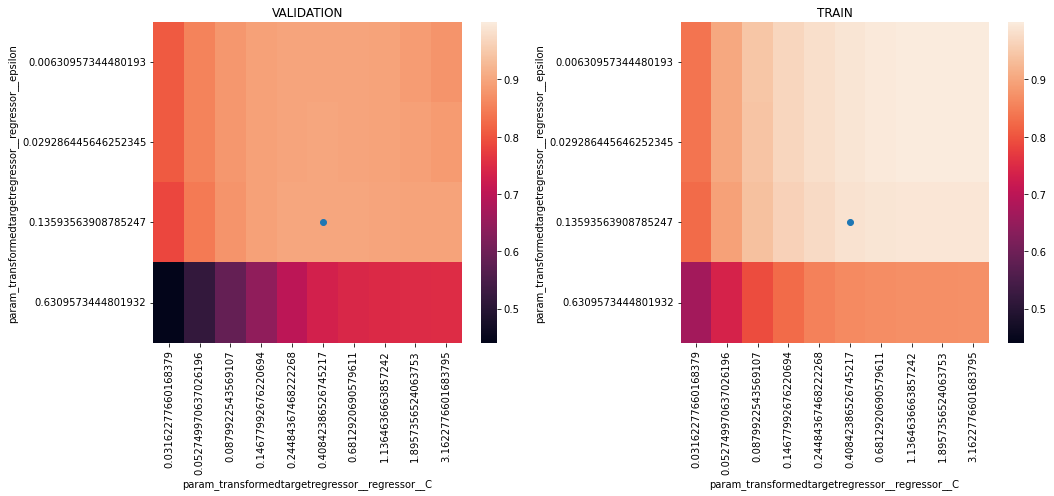

In [7]:
C, eps = SVR_nested_CV_gridsearch(daily_input, C_range,epsilon_range, t_range,t_unit,n_splits,test_size)
print(f'C={C}')
print(f'eps={eps}')

In [7]:
C=0.40842386526745217
eps=0.13593563908785247

In [8]:
radius_for_ensemble = 1
predictions = nested_CV_SVR_predict(daily_input, C, eps, t_length,t_unit, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

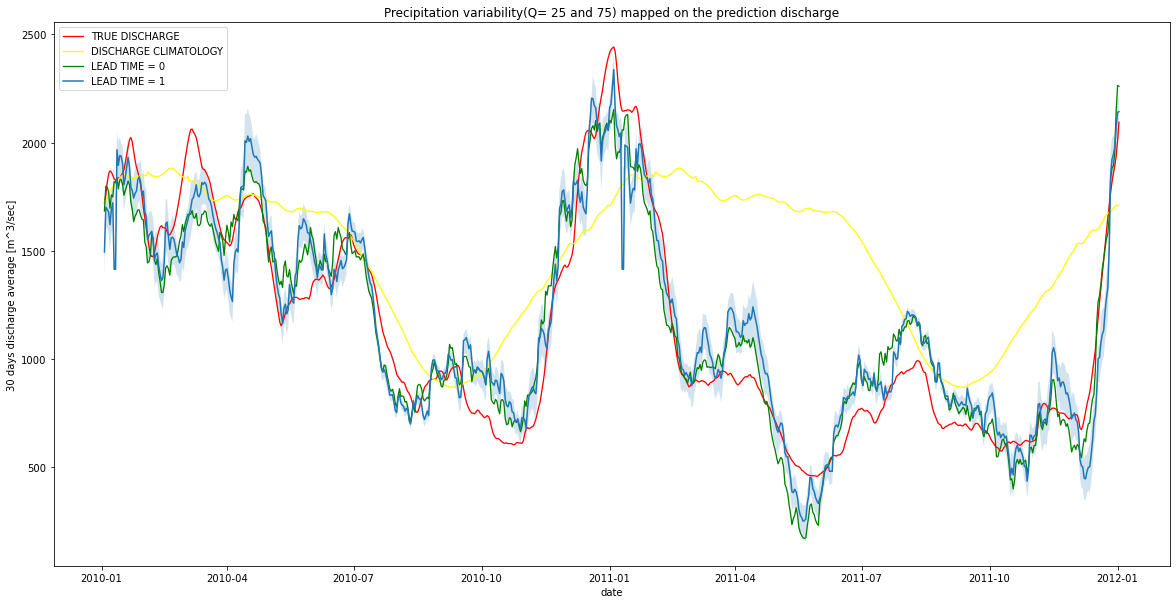

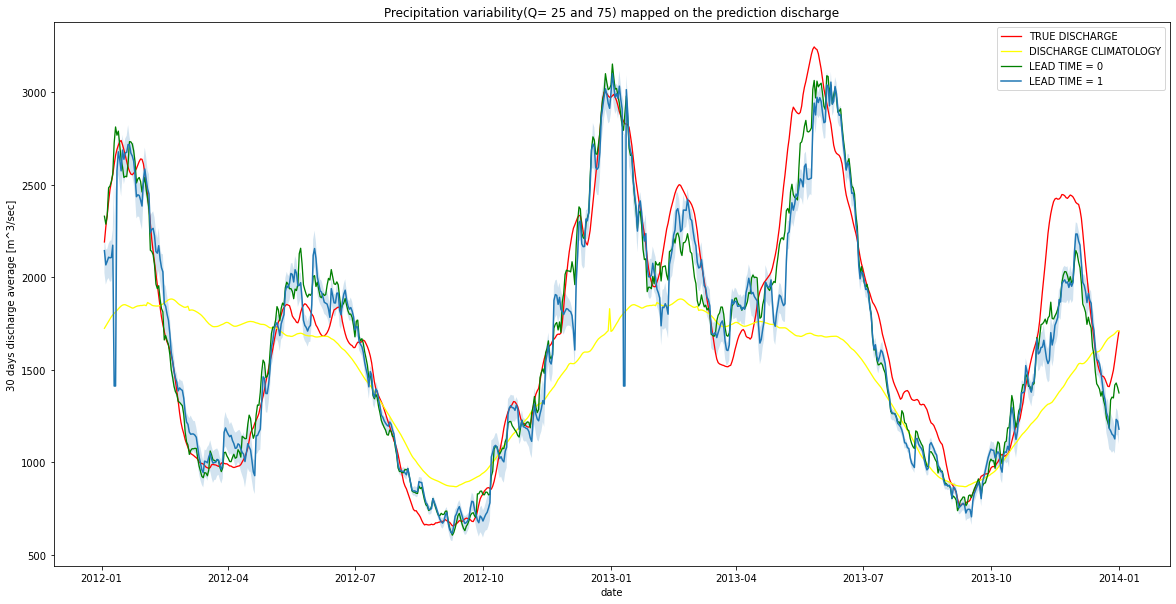

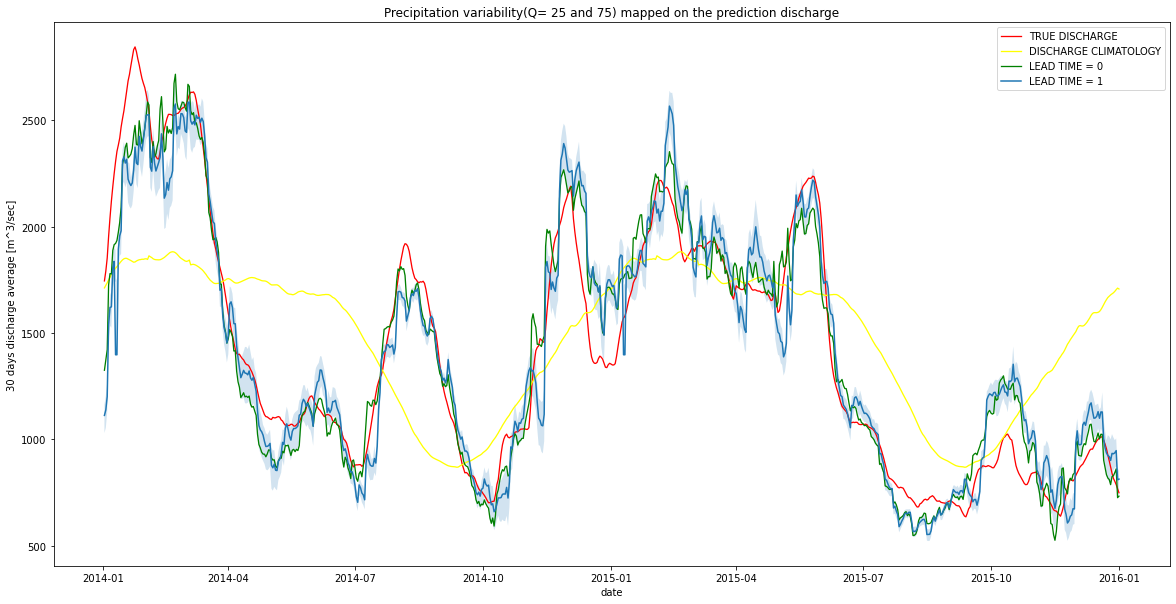

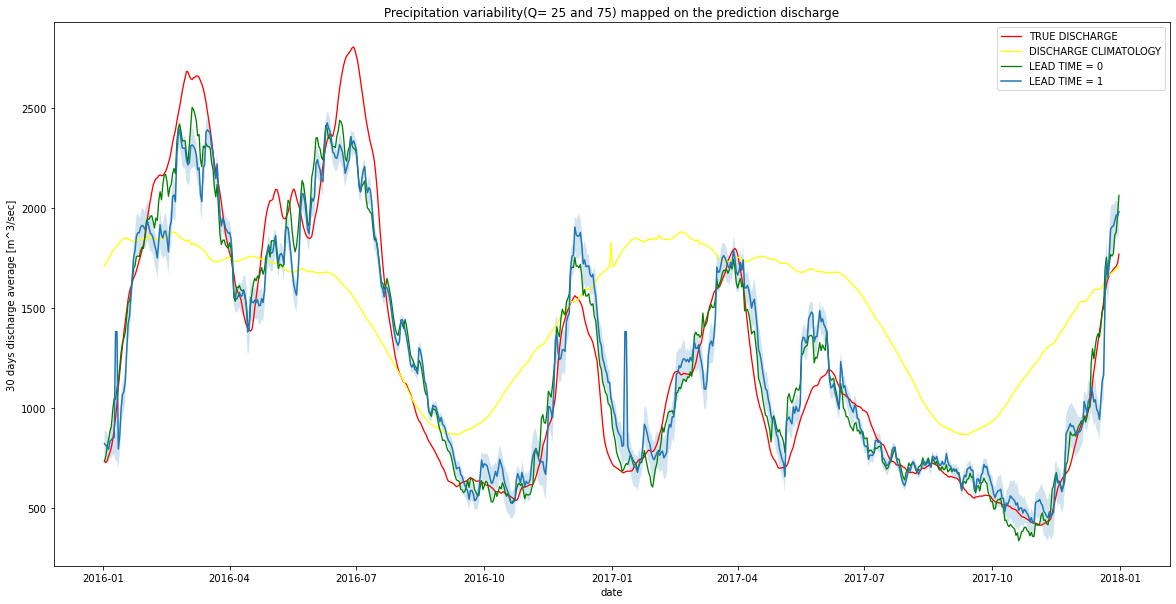

In [9]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions)


C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

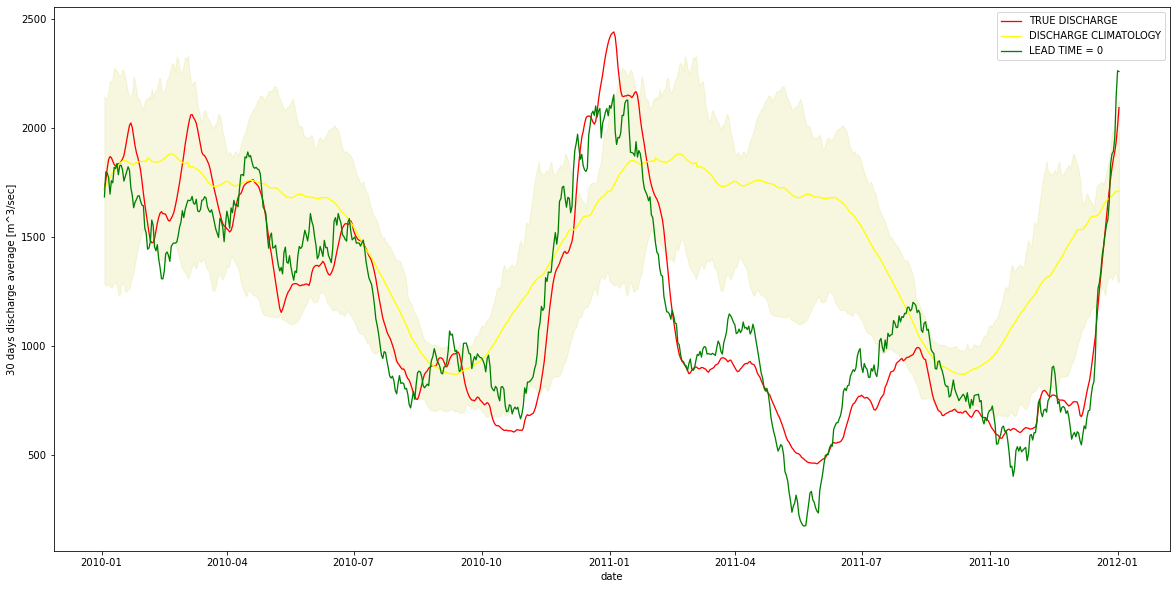

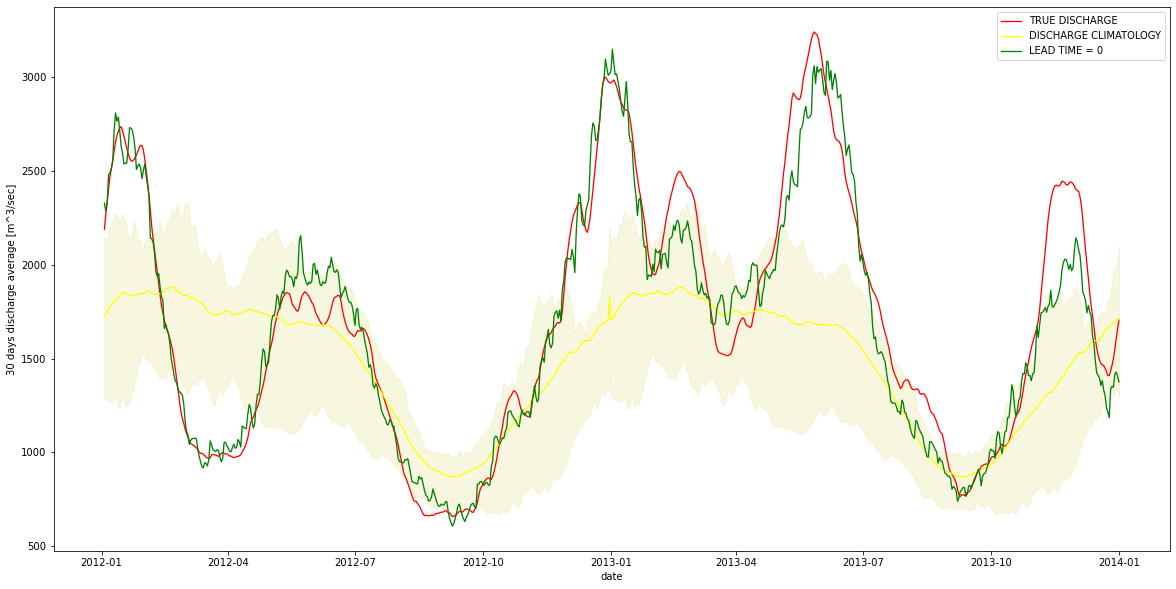

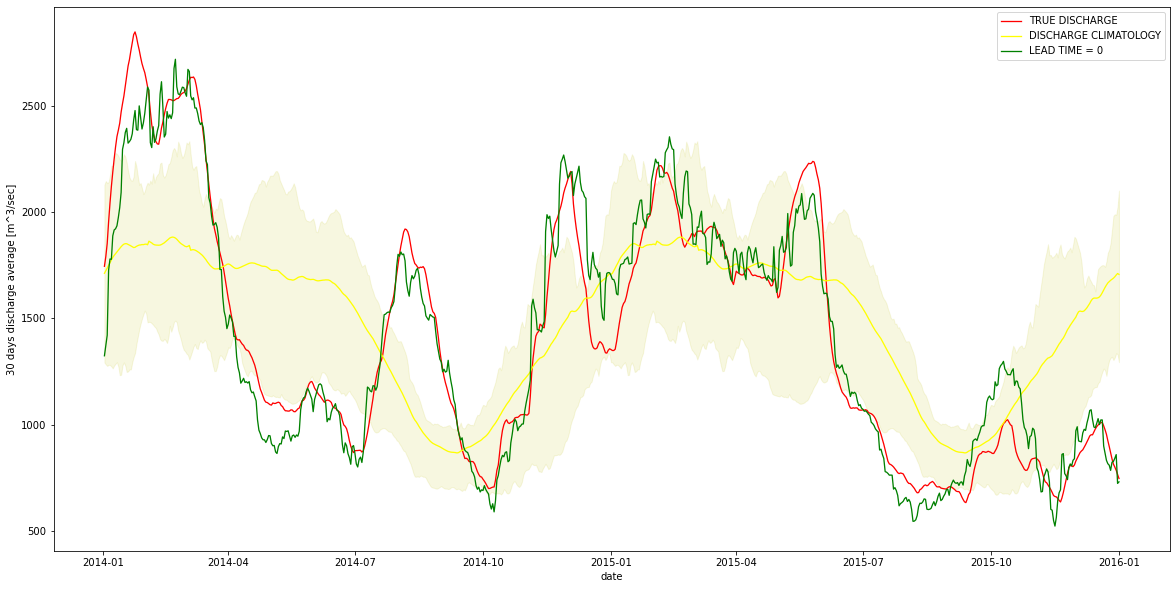

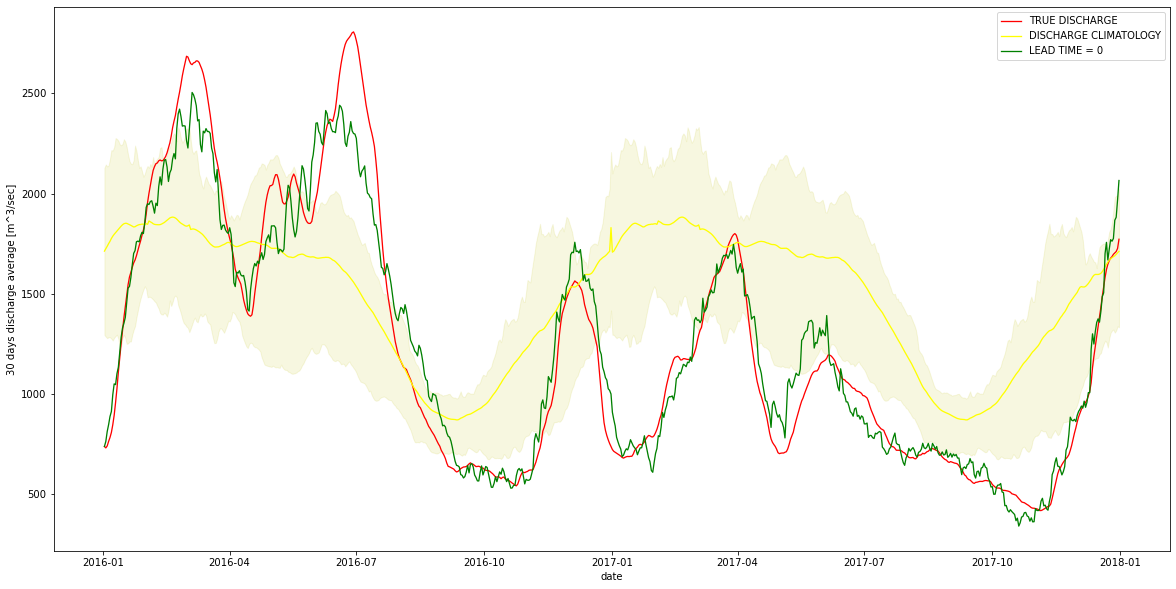

In [11]:
    prediction=predictions
    splits=prediction['split'].max()
    for i in range(splits+1):
        query=f'split=={i}'
        #query='split==' + str(i)
        pred=prediction.query(query)
        pred.loc[:,'date']= pred.index

        ax,fig=plt.subplots(figsize=(20,10))
        #plot the real
        sns.lineplot(y=("true_runoff"),x="date",data=pred,color='red',linewidth=1.3,legend='auto')
        sns.lineplot(y=("runoff_clim"),x="date",data=pred,color='yellow',linewidth=1.3,legend='auto')
        sns.lineplot(y=("trueTP"),x="date",data=pred,color='green',linewidth=1.3,legend='auto')


        #plot the clim_distr
        lt1=pred[["runoff_clim_25","runoff_clim_75"]]
        #lt1.columns=np.repeat('climatologia_lt1_ensemple_prec',3)
        #sns.lineplot(data=lt1["climTP_lt1"],legend='auto')
        plt.fill_between(x=lt1.index, y1=lt1['runoff_clim_25'], y2=lt1['runoff_clim_75'], alpha=0.12,color='y')

        """
        #plot the lead_time_
        lt4=pred[["climTP_lt4","climTP_lt4_Q25","climTP_lt4_Q75"]]
        #lt4.columns=np.repeat('climatologia_lt4_ensemple_prec',3)
        sns.lineplot(data=lt4["climTP_lt4"], palette=['green'],legend='auto')
        plt.fill_between(x=lt4.index, y1=lt4['climTP_lt4_Q25'], y2=lt4['climTP_lt4_Q75'], alpha=0.2)
        """

        plt.ylabel('30 days discharge average [m^3/sec]')

        plt.legend(['TRUE DISCHARGE', 'DISCHARGE CLIMATOLOGY', 'LEAD TIME = 0'])    
        plt.title("")

In [126]:
import sys, importlib
importlib.reload(sys.modules['test'])

<module 'test' from 'C:\\Users\\mmazzolini\\OneDrive - Scientific Network South Tyrol\\Documents\\conda\\Runoff_prediction\\model_train\\..\\test.py'>

In [127]:
from test import evaluate_class, evaluate_class_season
clas=evaluate_class_season(predictions)
clas

In [141]:
np.sum(clas.number)

1053.0

In [140]:
evaluate_class(predictions)

,sensitivity,specificity,precision,number
0,0.814815,0.955008,0.910828,1053.0


measured runoff             1.000000
runoff climatology          0.287352
model output                0.936600
output 1 month lead time    0.900676
output 2 month lead time    0.776568
output 3 month lead time    0.570184
output 4 month lead time    0.415206
output 5 month lead time    0.290319
dtype: float64

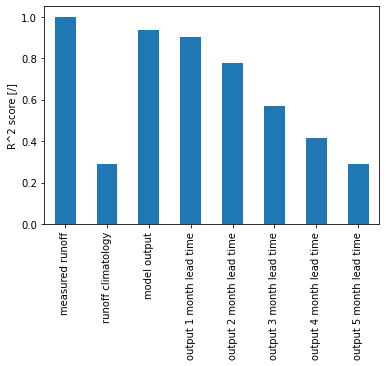

In [9]:
evaluate_prediction(predictions)

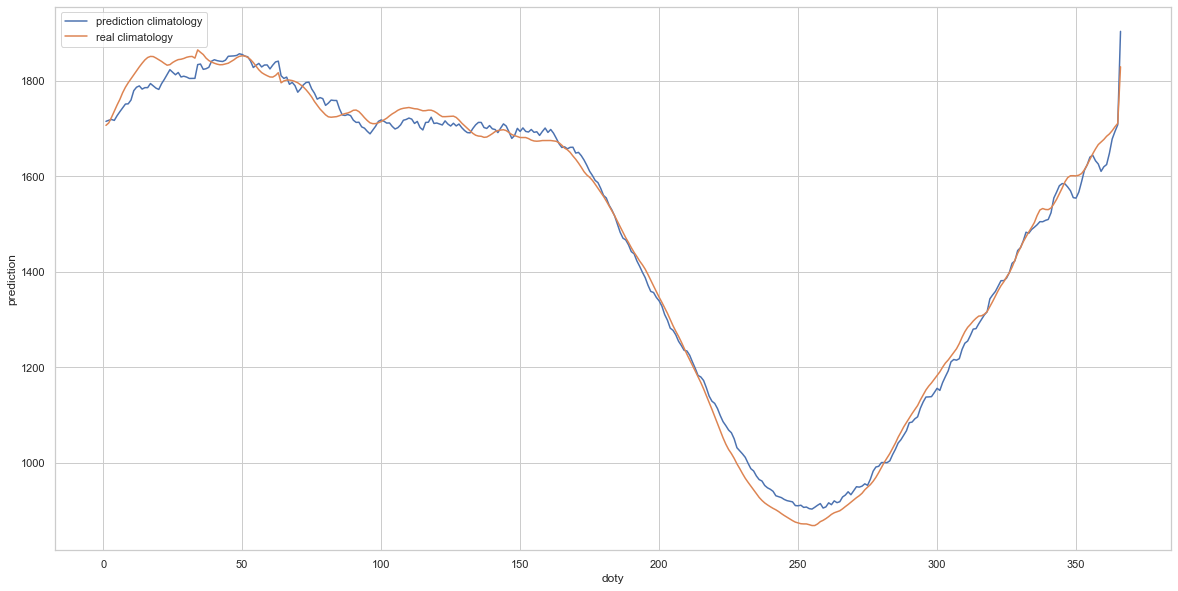

In [160]:
predictions_for_clim = classic_CV_SVR_predict(daily_input, C, eps, t_length,t_unit, 20)
climatologies =predictions_for_clim.groupby(by=predictions_for_clim.index.day_of_year).mean().loc[:,['prediction','true_runoff']]
climatologies['doty']=climatologies.index

sns.set_theme(style="whitegrid")
ax,fig=plt.subplots(figsize=(20,10))
sns.lineplot(data=climatologies,x='doty',y='prediction',label='prediction climatology')
sns.lineplot(data=climatologies,x='doty',y='true_runoff',label='real climatology')
plt.legend()

In [161]:
daily_input

,Q,T,T5,T25,T75,T95,E,E5,E25,E75,...,P,P5,P25,P75,P95,S,S5,S25,S75,S95
1979-01-01,2280.0,266.876456,262.174092,264.777865,269.150431,271.769309,0.391134,-0.005800,0.273901,0.531994,...,NaN,NaN,NaN,NaN,NaN,-32767.777000,-32767.0,-32767.0,-32767.00,-32767.00
1979-01-02,2470.0,263.137615,250.450491,261.616847,266.920904,267.913553,0.215762,-0.045346,0.104401,0.321246,...,0.490303,0.003185,0.028051,0.335382,2.661758,-32767.777000,-32767.0,-32767.0,-32767.00,-32767.00
1979-01-03,2250.0,265.069197,253.009866,263.964246,268.177410,269.796374,0.073073,-0.100037,-0.036832,0.108177,...,1.959638,0.140745,0.905980,2.705043,4.647401,2.037424,0.0,0.0,3.00,8.00
1979-01-04,2270.0,267.344933,256.471460,266.621912,269.692050,272.775005,0.286727,0.044709,0.143147,0.358098,...,2.358362,0.013771,0.154327,3.423962,8.454359,6.771105,0.0,2.0,10.00,19.00
1979-01-05,2340.0,268.338572,258.071150,267.076992,271.385299,273.578574,0.097914,-0.086514,-0.021657,0.131192,...,4.847036,0.071064,1.713569,7.265067,14.407022,6.957354,0.0,2.0,11.00,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1450.0,275.762241,267.536501,274.311157,278.465388,279.337618,0.310624,-0.051833,0.118542,0.492177,...,3.219864,0.913834,2.037123,4.091087,6.410201,38.664490,0.0,0.0,36.00,227.15
2017-12-28,1490.0,271.553773,262.941588,270.339651,274.039718,274.848338,0.265632,0.010771,0.131443,0.352126,...,13.674267,2.323624,6.976157,19.343043,28.049541,38.840733,0.0,0.0,36.75,227.15
2017-12-29,1500.0,270.972396,259.937913,269.350081,274.155302,274.844749,0.103690,-0.133730,-0.002476,0.201739,...,0.398115,0.024850,0.120808,0.509523,1.137671,47.858574,0.0,2.0,49.75,248.00
2017-12-30,1670.0,278.579039,269.982891,276.958262,281.542313,282.258325,0.196162,0.010845,0.099349,0.269642,...,13.904543,5.637641,10.025232,16.922882,23.375046,45.545258,0.0,0.0,42.00,267.30


In [162]:
#fewer splits
predictions_for_clim.rename(columns={"prediction": "trueTP"},inplace=True)
res=evaluate_class_season(predictions_for_clim)
res.index=np.repeat(nb_name[:-6],4)
res

,sensitivity,specificity,precision,number,season
ADO_DSC_FRK2_0042_2,0.781457,0.955254,0.863415,906.0,0
ADO_DSC_FRK2_0042_2,0.651795,0.977847,0.913110,919.0,1
ADO_DSC_FRK2_0042_2,0.708696,0.977873,0.919605,920.0,2
ADO_DSC_FRK2_0042_2,0.684624,0.955590,0.842541,891.0,3


In [159]:
#fewer splits
predictions_for_clim.rename(columns={"prediction": "trueTP"},inplace=True)
res=evaluate_class_season(predictions_for_clim)
res.index=np.repeat(nb_name[:-6],4)
res

,sensitivity,specificity,precision,number,season
ADO_DSC_FRK2_0042_2,0.722958,0.950459,0.840822,906.0,0
ADO_DSC_FRK2_0042_2,0.589771,0.979790,0.912458,919.0,1
ADO_DSC_FRK2_0042_2,0.670652,0.975543,0.907353,920.0,2
ADO_DSC_FRK2_0042_2,0.679012,0.958707,0.850914,891.0,3


In [158]:
res.index=np.repeat(nb_name[:-6],4)

<AxesSubplot:ylabel='R^2 score [/]'>

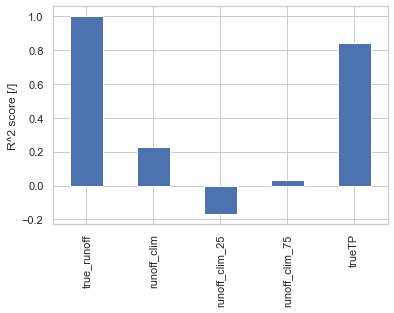

In [150]:
    from sklearn.metrics import mean_squared_error, r2_score

    runoff=predictions_for_clim.drop(columns='season')
    runoff_error_r2=runoff.apply(lambda y_pred: r2_score(runoff['true_runoff'], y_pred), axis=0)
    #runoff_error_smape=runoff.apply(lambda y_pred: smape(runoff['true_runoff'], y_pred), axis=0)
    
    #runoff_error_smape.plot.bar(ylabel="SMAPE score [/]")
    

    
    #pdb.set_trace()
   
    runoff_error_r2.plot.bar(ylabel="R^2 score [/]", rot=90)
    #plt.legend(['MEASURED DISCHARGE','RUNOFF CLIMATOLOGY','MODEL PREDICTION','PREDICTION WITH 1 MONTH LEAD TIME','','']

In [11]:
##develop model savior

from sklearn.svm import SVR, LinearSVR
from sf_runoff import create_it_matrix
from joblib import dump, load

it_matrix=create_it_matrix(daily_input,t_length,t_unit).astype('float32')

X = it_matrix.drop(columns='Q')
y = it_matrix['Q']
svr_estimator = SVR(kernel='rbf', gamma='scale', cache_size=15000,C=C,epsilon=eps)

svr_estimator = make_pipeline(StandardScaler(),
                              TransformedTargetRegressor(regressor=svr_estimator, transformer=StandardScaler()))

svr_estimator.fit(X, y)

path='models/'+nb_name[:-6]+'.joblib'

dump(svr_estimator, path)

['models/ADO_DSC_FRK2_0042_2.joblib']